# Using FFT-based filter to reduce noise


In [153]:
from numpy import *
from numpy.fft import fft, ifft
from matplotlib.pyplot import *
%matplotlib inline

# redefine default figure size and fonts
import matplotlib as mpl
mpl.rc('font', size=16)
mpl.rc('figure',figsize=(12,8))
mpl.rc('lines', linewidth=1, color='lightblue',linestyle=':',marker='o')

In [154]:
# fs = 100.0 # sampling frequency (Hz)
# T = 3.0 # total actual sample time (s)
data = loadtxt('data_for_FFT_filter.txt')

In [155]:
data.shape
t = data[:,0]
f = data[:,1]

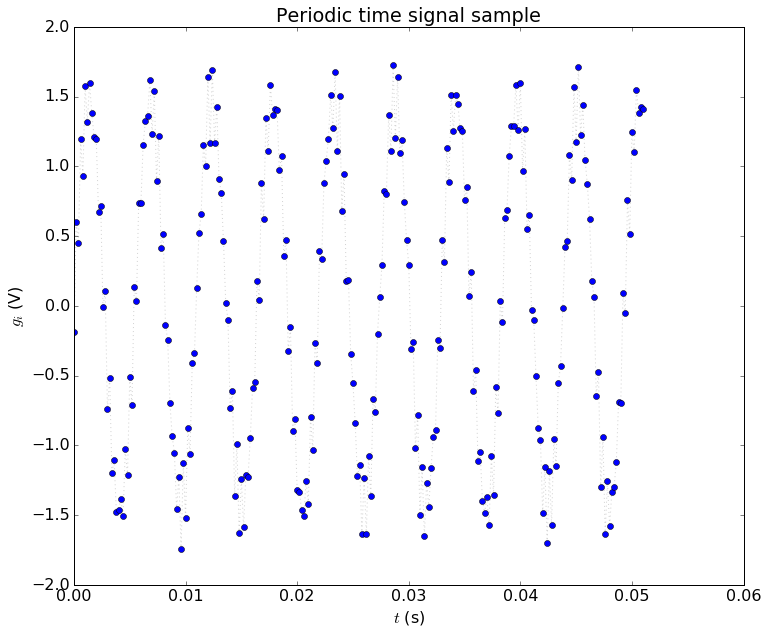

In [156]:
# plotSignal(t,g,fs)
fig = figure(figsize=(12,10))
plot(t,f,marker='o',markerfacecolor='b',linestyle=':',color='lightgrey')
xlabel('$t$ (s)')
ylabel('$g_i$ (V)')
title('Periodic time signal sample')
show()

### Calculate the necessary parameters: $N, \Delta t, \Delta f, f_{fold},N_{freq}$ and perform FFT

In [157]:
N = len(t)
# frequency is simply 1 over the time interval
f_s = 1./(t[1]-t[0])
# Total sample time is N/f_s
T = N/f_s
# delta t is equal to 1/f_s
del_t = 1./f_s
# delta f is equal to 1/T
del_f = 1./T
# folding frequency is maximum frequency of FFT, is equal to f_s/2
f_fold = f_s/2.
# Finally, number of discrete frequencies is simply N/2
N_disc = int(N/2.)

# frequency will be increasing from 0 to folding frequency by delta f, then
# decreasing to a value equal to delta f
f_incr = arange(0,f_fold+del_f,del_f)
f_dcr = arange((f_fold-del_f),0,-del_f)
frequency = r_[f_incr, f_dcr]
# Perform FFT, use fft matlab function
FFT1 = fft(f)
# Find the magnitude, using the IMABS function and dividing by N/2. (note
# IMABS is simply abs(x) in MATLAB.) Don't forget to divide the first value
# by 2. 
magnitude1 = abs(FFT1)/N_disc
magnitude1[0] /= 2.

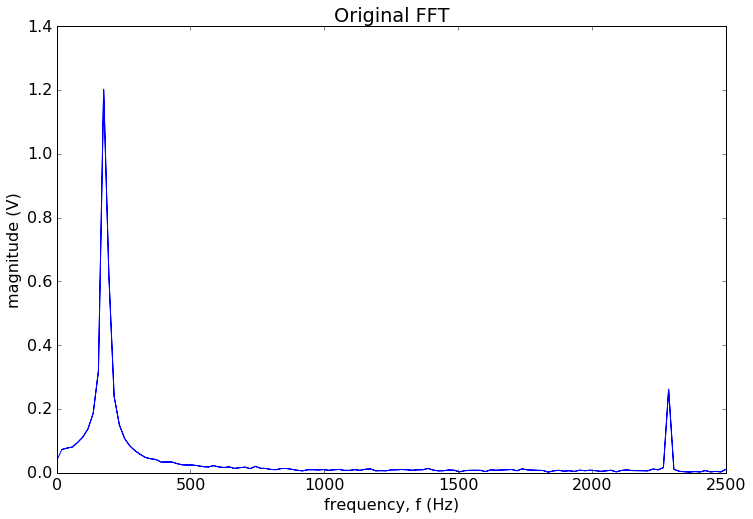

In [158]:
# plot:
figure()
plot(frequency, magnitude1,'-b')
title('Original FFT')
xlabel('frequency, f (Hz)')
ylabel('magnitude (V)');

## Define cut off frequency and the order of the filter

In [159]:
f_cut = 500 # Hz
order_n = 10  # Butterworth filter

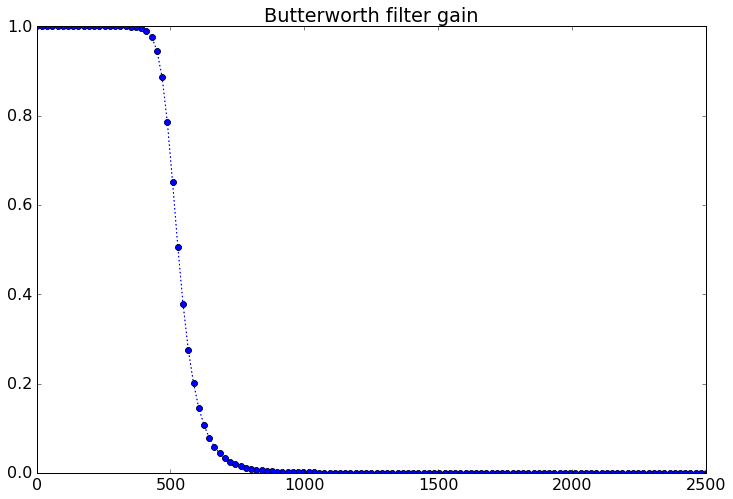

In [160]:
# Next, obtain filter gain,
G = 1./sqrt(1+((frequency/f_cut)**(2*order_n)))
figure()
plot(frequency,G)
title('Butterworth filter gain')

In [161]:
# Filtered FFT = FFT output * filter gain,
FFT_filtered = FFT1*G; 
# Next, the inverse fft simply uses MATLAB's built in inverse FFT function.
FFT_inv = ifft(FFT_filtered)
# To perform the final FFT, take the FFT of the real part of FFT_inv
FFT2 = fft(real(FFT_inv))
# Find magnitude 
magnitude2 = abs(FFT2)/N_disc
magnitude2[0] /= 2.

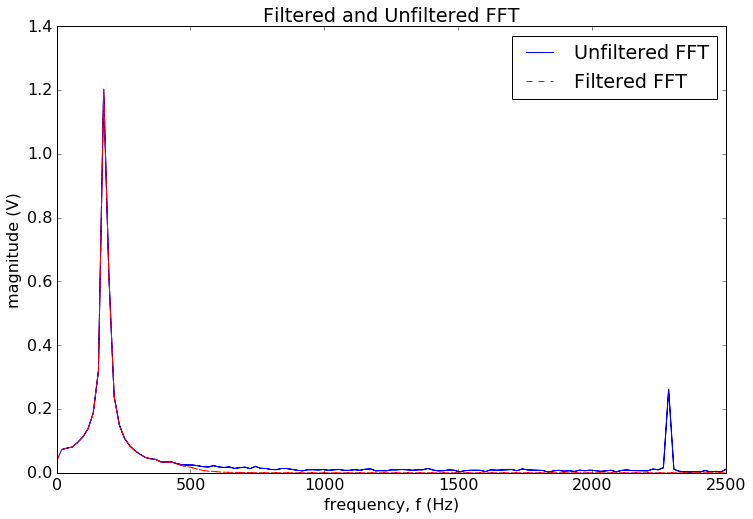

In [162]:
# plot:
# plot unfiltered (blue) and filtered (red) FFTs with title, axis labels, and
# legend.
figure()
plot(frequency, magnitude1,'-b')
plot(frequency, magnitude2,'--r')
title('Filtered and Unfiltered FFT')
xlabel('frequency, f (Hz)')
ylabel('magnitude (V)')
legend(('Unfiltered FFT','Filtered FFT'));

(0, 0.051)

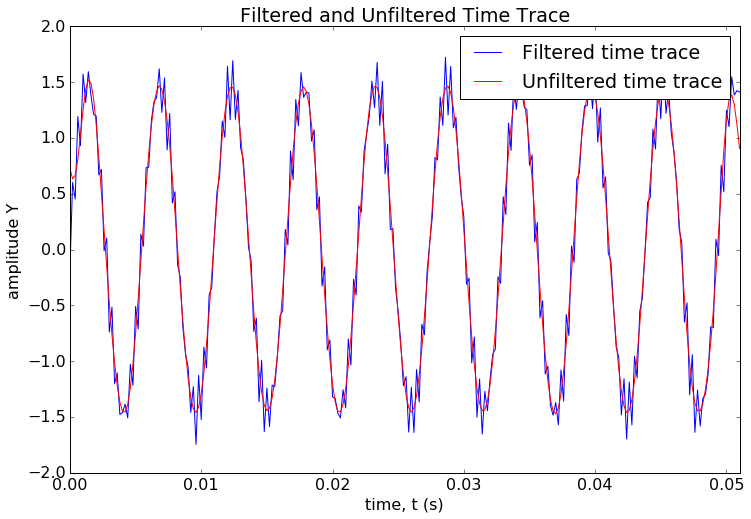

In [163]:
figure()
plot(t,f,'-b')
plot(t,real(FFT_inv),'-r')
title('Filtered and Unfiltered Time Trace')
xlabel('time, t (s)')
ylabel('amplitude Y')
legend(('Filtered time trace','Unfiltered time trace'))
xlim([0, 0.0510])